# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import re
warnings.simplefilter('ignore')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline


## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [6]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [8]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [10]:
for i in ['Age','Cabin','Embarked']:
    print(f'Missed {i} (all) ', round(data[i].isnull().sum()/data.shape[0] *100,2) ,'%')
    print(f'Missed {i}(male) ', round(data[data['Sex']=='male'][i].isnull().sum()/data.shape[0] *100,2) ,'%')
    print(f'Missed {i}(female) ', round(data[data['Sex']=='female'][i].isnull().sum()/data.shape[0] *100,2) ,'%')
    print('*'*50)
    print()

Missed Age (all)  19.87 %
Missed Age(male)  13.92 %
Missed Age(female)  5.95 %
**************************************************

Missed Cabin (all)  77.1 %
Missed Cabin(male)  52.75 %
Missed Cabin(female)  24.35 %
**************************************************

Missed Embarked (all)  0.22 %
Missed Embarked(male)  0.0 %
Missed Embarked(female)  0.22 %
**************************************************



#### Уникальные значения

In [11]:
print('Уникальные значения')
for i in data.columns:
    print(f'{i}: {data[i].nunique()}')


Уникальные значения
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3
Survived: 2


#### Распределение по наблюдению Sex

In [12]:
def survived_male_female(data, sex):
    survaved = data.loc[data['Sex'] == sex]['Survived'].value_counts()
    df_survaved = data.loc[data['Sex'] == sex]
    print(f'Всего {sex} на борту: {survaved.sum()} из {data["Sex"].count()}')

    print(f'Процент {sex} на борту: {np.round(survaved.sum()/data["Sex"].count(),2)*100 }%')

    print(f'Количество погибших {sex}: {survaved[0]} из {survaved.sum()} --> {np.round(survaved[0]/survaved.sum(),3)*100} %')

    print(f'Количество выживших {sex}: {survaved[1]} из {survaved.sum()} --> {np.round(survaved[1]/survaved.sum(),3)*100} %')
    
    sns.catplot(x="Survived", kind = 'count', data=df_survaved)
    plt.title(sex)


Всего male на борту: 577 из 891
Процент male на борту: 65.0%
Количество погибших male: 468 из 577 --> 81.10000000000001 %
Количество выживших male: 109 из 577 --> 18.9 %


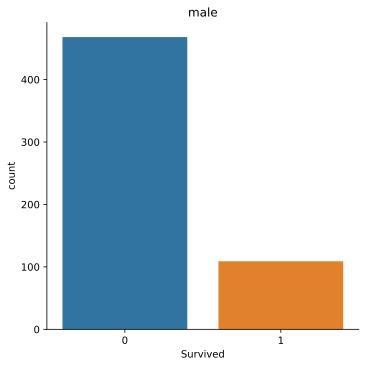

In [13]:
survived_male_female(data,'male')

Всего female на борту: 314 из 891
Процент female на борту: 35.0%
Количество погибших female: 81 из 314 --> 25.8 %
Количество выживших female: 233 из 314 --> 74.2 %


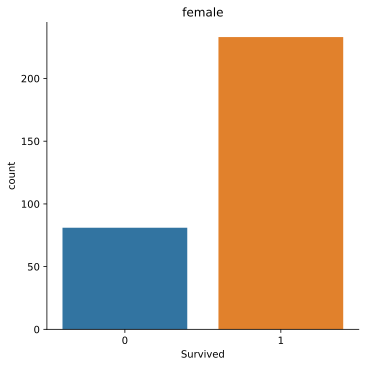

In [14]:
survived_male_female(data,'female')

#### Распределение мужчин и женщин по классу

In [15]:
# Уникальные значения класса
pclass = data['Pclass'].unique()
print('Уникальыне значения Pclass',*pclass)

Уникальыне значения Pclass 3 1 2


In [16]:
def pclass_survived_sex(data, Pclass:list, sex:str):
    
    """
    Передаем в данную функцию три параметра:
        data - наш DataFrame
        Pclass - список уникальных значений Pclass
        sex - пол пассажира
        
    на выводе функции у нас идет посчет выживших и погибших
    так же выводим график из библионтеки seaborn
    
    """
    
    for pcl in Pclass:
        count_sex = data.loc[(data['Pclass'] == pcl) & (data['Sex'] == sex)]['Survived'].value_counts()
        
        print(f'Класс {pcl}')
        print(f'Пол: {sex}')
        print(f'Всего {sex} в {pcl} классе: {count_sex.sum()}')
        print(f'Выжившие: {count_sex[1]} --> {np.round(count_sex[1]/count_sex.sum(),3) *100}%')
        print(f'Погибшие: {count_sex[0]} --> {np.round(count_sex[0]/count_sex.sum(),3) *100}%')
        print()
        
    sns.catplot(x = 'Pclass', kind = 'count' , hue = 'Survived', data = data[data['Sex'] == sex])
    plt.title(sex)


Класс 3
Пол: male
Всего male в 3 классе: 347
Выжившие: 47 --> 13.5%
Погибшие: 300 --> 86.5%

Класс 1
Пол: male
Всего male в 1 классе: 122
Выжившие: 45 --> 36.9%
Погибшие: 77 --> 63.1%

Класс 2
Пол: male
Всего male в 2 классе: 108
Выжившие: 17 --> 15.7%
Погибшие: 91 --> 84.3%



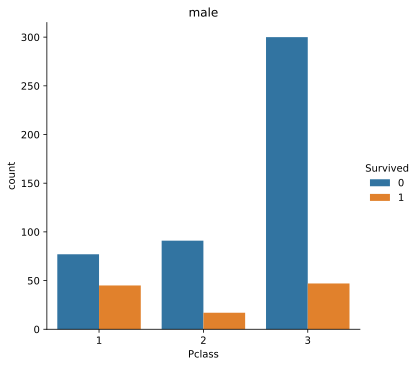

In [17]:
pclass_survived_sex(data, pclass, 'male')

Класс 3
Пол: female
Всего female в 3 классе: 144
Выжившие: 72 --> 50.0%
Погибшие: 72 --> 50.0%

Класс 1
Пол: female
Всего female в 1 классе: 94
Выжившие: 91 --> 96.8%
Погибшие: 3 --> 3.2%

Класс 2
Пол: female
Всего female в 2 классе: 76
Выжившие: 70 --> 92.10000000000001%
Погибшие: 6 --> 7.9%



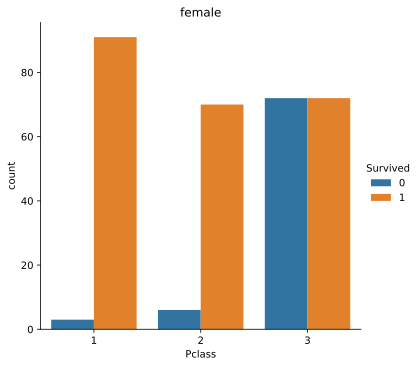

In [18]:
pclass_survived_sex(data, pclass, 'female')

#### Возраст выживших и погибших 

In [19]:
def age_survived(data, sur, value:str):
 
    
    
    survived = {1:'Выжившие',
               0:'Погибшие'}
    
    
    for s in sur:
        print(survived[s],'male+famale','\n')
        print(f' Средний {value} пассажиров: {data.query("Survived == @s")[value].mean()}')
        print(f' Максимальный {value} пассажиров: {data.query("Survived == @s")[value].max()}')
        print(f' Минимальный {value} пассажиров: {data.query("Survived == @s")[value].min()}')
        print(f' Медианный {value} пассажиров: {data.query("Survived == @s")[value].median()}')
        print()
        
        for sex in data['Sex'].unique():
            print(sex)
            print(f' Средний {value} пассажиров: {data.query("(Survived == @s)& (Sex == @sex)")[value].mean()}')
            print(f' Максимальный {value} пассажиров: {data.query("(Survived == @s)& (Sex == @sex)")[value].max()}')
            print(f' Минимальный {value} пассажиров: {data.query("(Survived == @s)& (Sex == @sex)")[value].min()}')
            print(f' Медианный {value} пассажиров: {data.query("(Survived == @s)& (Sex == @sex)")[value].median()}')
            print()
        print('*'*50)
        
    sns.catplot(x="Pclass", y=value,
                hue="Sex", col="Survived",
                data=data, kind="swarm",
                height=5);

Погибшие male+famale 

 Средний Age пассажиров: 30.62617924528302
 Максимальный Age пассажиров: 74.0
 Минимальный Age пассажиров: 1.0
 Медианный Age пассажиров: 28.0

male
 Средний Age пассажиров: 31.618055555555557
 Максимальный Age пассажиров: 74.0
 Минимальный Age пассажиров: 1.0
 Медианный Age пассажиров: 29.0

female
 Средний Age пассажиров: 25.046875
 Максимальный Age пассажиров: 57.0
 Минимальный Age пассажиров: 2.0
 Медианный Age пассажиров: 24.5

**************************************************
Выжившие male+famale 

 Средний Age пассажиров: 28.343689655172415
 Максимальный Age пассажиров: 80.0
 Минимальный Age пассажиров: 0.42
 Медианный Age пассажиров: 28.0

male
 Средний Age пассажиров: 27.276021505376345
 Максимальный Age пассажиров: 80.0
 Минимальный Age пассажиров: 0.42
 Медианный Age пассажиров: 28.0

female
 Средний Age пассажиров: 28.84771573604061
 Максимальный Age пассажиров: 63.0
 Минимальный Age пассажиров: 0.75
 Медианный Age пассажиров: 28.0

*****************

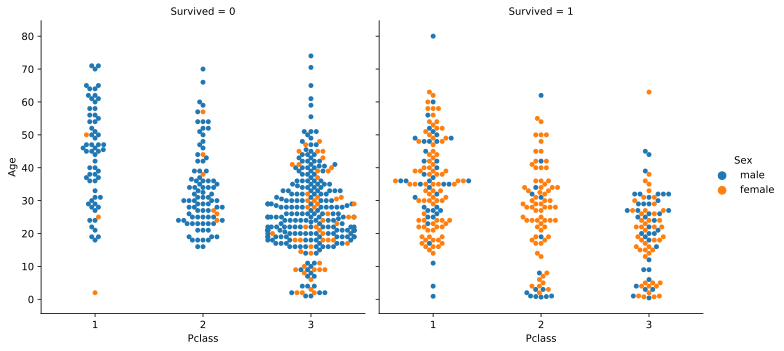

In [20]:
age_survived(data, data['Survived'].unique(), 'Age')

По этим данным мы можем выделить новую категорию выживших и это "ДЕТИ"
мы видим, что есть разрыв в возраст, примерно  от 10 до 15 лет и есть у каждой категории SEX кучность выживших детей

Из всего выше проанализирвоанного можно смело сказать, что спасали в первую очеред женщин и детей из 1 и 2 класса , и 3 класс был самый последний на спасение. Это видно по графикам спасения женщин , что  в классе 3 распеределение было 50% на 50% 

In [21]:
def subplots(data, value):
    fig, (ax1, ax2) = plt.subplots(2,figsize = (6,6))
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

    fare = data[[value]]
    fare_log = np.log(data[[value]]+1)



    bar_1 = sns.distplot(fare, ax = ax1)
    bar_1.legend([f"skew {round(fare.skew(),2)}"])

    bar_2 = sns.distplot(fare_log, ax = ax2)
    bar_2.legend([f"skew {round(fare_log.skew(),2)}"])



    ax1.set_title(f'{value} - standart')
    ax2.set_title(fr'{value} - $log({value})$')
    plt.show()

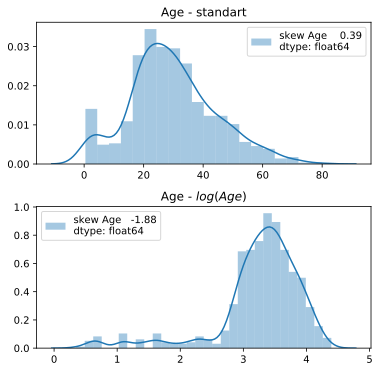

In [22]:
subplots(data, 'Age')

По этому графику можно определить, что логарифмирвоание не очень подходит для данного наблюдения. Мы этим только сделали хуже. Но в дальнейшем построим отдельное наблюдение с логарифмирвоанием наблюдения И посмотрим как оно повлияет на наши предсказания.

#### Fare
Проверим, то как влияев данная фича на распределение выживших и погибших

Погибшие male+famale 

 Средний Fare пассажиров: 22.117886885245877
 Максимальный Fare пассажиров: 263.0
 Минимальный Fare пассажиров: 0.0
 Медианный Fare пассажиров: 10.5

male
 Средний Fare пассажиров: 21.960992948717944
 Максимальный Fare пассажиров: 263.0
 Минимальный Fare пассажиров: 0.0
 Медианный Fare пассажиров: 9.41665

female
 Средний Fare пассажиров: 23.02438518518519
 Максимальный Fare пассажиров: 151.55
 Минимальный Fare пассажиров: 6.75
 Медианный Fare пассажиров: 15.2458

**************************************************
Выжившие male+famale 

 Средний Fare пассажиров: 48.39540760233917
 Максимальный Fare пассажиров: 512.3292
 Минимальный Fare пассажиров: 0.0
 Медианный Fare пассажиров: 26.0

male
 Средний Fare пассажиров: 40.82148440366974
 Максимальный Fare пассажиров: 512.3292
 Минимальный Fare пассажиров: 0.0
 Медианный Fare пассажиров: 26.2875

female
 Средний Fare пассажиров: 51.93857339055791
 Максимальный Fare пассажиров: 512.3292
 Минимальный Fare пассажиров: 7

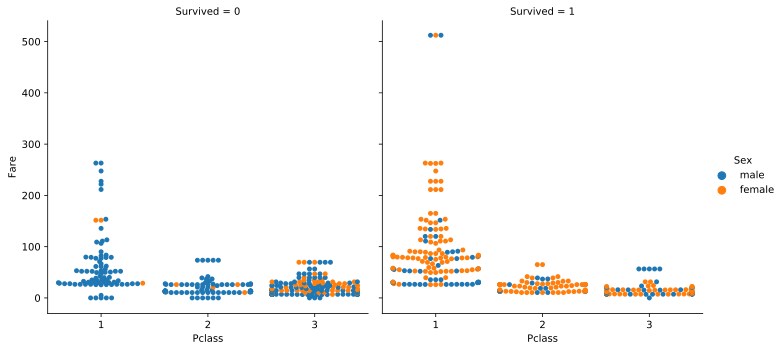

In [23]:
age_survived(data, data['Survived'].unique(), 'Fare')

да данным Fare можно выделить только Fare выше 500 , это самые дорогие билеты. 

По всем остальным, особенно между 200 т 300 , видно что пол пассажира важнее , чем его стоимотсь билета. 

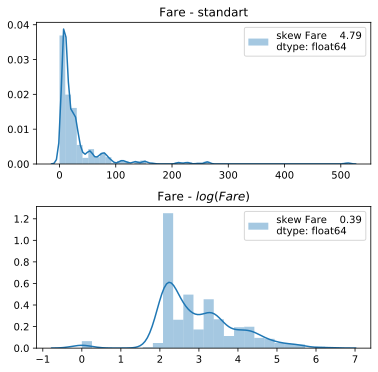

In [24]:
subplots(data, 'Fare')

По данным графикам видно, что есть сильные выбросы по данной категории и если прологорифмировать эти данный то можно практически добится распределения без выбросов

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [25]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [26]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [27]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size =0.3)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [28]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [29]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [34]:
def get_cabin_letter(row):
    return row['Cabin'][0]
data_train['cabin_type'] = data.apply(get_cabin_letter, axis=1)

In [35]:
data_train['cabin_type'] = data_train.apply(get_cabin_letter, axis=1)

In [31]:
data_test['cabin_type'] = data.apply(get_cabin_letter, axis=1)

In [38]:
data['Type_cabin'] = data['Cabin'].str[0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Type_cabin
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,0


Сюда добавьте описание вашего нового признака

#### Новые признаки

In [678]:
# Разделим пассажиров по катагериям возраста 
bins = [-np.inf, 15, 25 , 55, np.inf]
label = ['Child', 'Teenager', 'Adult', 'Old']
data_train['Type_People'] = pd.cut(data_train['Age'], bins, labels = label)
data_test['Type_People'] = pd.cut(data_test['Age'], bins, labels = label)

In [679]:
data_train['Type_People'].value_counts()

Adult       380
Teenager    163
Child        55
Old          25
Name: Type_People, dtype: int64

In [680]:
# Тут мы соеденим два признака , чтобы Sex+Type_People
def concat_data(data_train, feature_1:str, feature_2:str):
    data_train[feature_1+'_'+feature_2] = data_train[feature_1].astype(str)+'_'+data_train[feature_2].astype(str)

In [681]:
concat_data(data_train,'Sex','Type_People')
concat_data(data_test,'Sex','Type_People')

In [682]:
data_train['Sex_Type_People'].value_counts()

male_Adult         245
female_Adult       135
male_Teenager      108
female_Teenager     55
male_Child          28
female_Child        27
male_Old            19
female_Old           6
Name: Sex_Type_People, dtype: int64

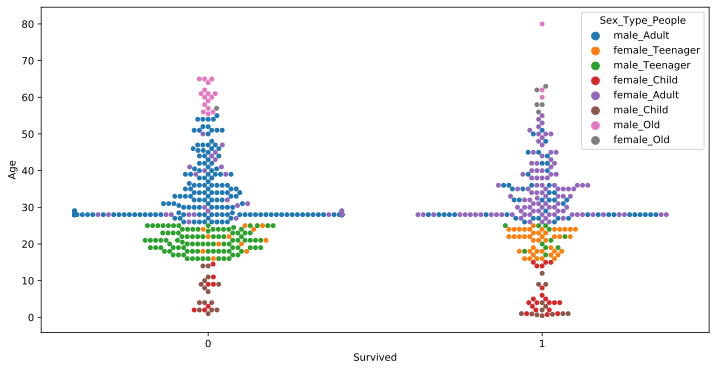

In [992]:
plt.figure(figsize = (12,6))
sns.swarmplot(x="Survived", y="Age", hue="Sex_Type_People", data=data_train)
plt.show()

#### Fare category

In [684]:
data_train['Fare'].describe()

count    623.000000
mean      32.298254
std       50.559708
min        0.000000
25%        7.925000
50%       14.400000
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

разобьем данные по квантилям 

In [685]:
bins = [-np.inf, 8 , 15, 31, np.inf]
label = ['price<8', '8<price<=15', '15<price<31','31<price']
data_train['Type_Fare'] = pd.cut(data['Fare'], bins, labels = label)
data_test['Type_Fare'] = pd.cut(data['Fare'], bins, labels = label)

In [686]:
data_train['Type_Fare'].value_counts()

price<8        168
8<price<=15    156
31<price       151
15<price<31    148
Name: Type_Fare, dtype: int64

#### Fare + np.log()

In [687]:
data_train['Fare_log'] = np.log(data_train['Fare'] +1)
data_test['Fare_log'] = np.log(data_test['Fare'] +1)

In [688]:
data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,Type_People,Sex_Type_People,Type_Fare,Fare_log
PassengerId,,,,,,,,,,,,,,,,
649,3,"Willey, Mr. Edward",male,28.0,0,0,S.O./P.P. 751,7.5500,0,S,0,0,Adult,male_Adult,price<8,2.145931
702,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,1,E,Adult,male_Adult,15<price<31,3.306429
57,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,0,S,1,0,Teenager,female_Teenager,8<price<=15,2.442347
445,3,"Johannesen-Bratthammer, Mr. Bernt",male,28.0,0,0,65306,8.1125,0,S,1,0,Adult,male_Adult,8<price<=15,2.209647
406,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,0,S,0,0,Adult,male_Adult,15<price<31,3.091042


#### Name

In [689]:
data_train['Name'] = data_train['Name'].str.lower()
data_test['Name'] = data_test['Name'].str.lower()

In [690]:
name_train = data_train['Name'].unique()
name_train = pd.Series(data =name_train, index = name_train, name = 'name_train')
name_train

willey, mr. edward                                                            willey, mr. edward
silverthorne, mr. spencer victor                                silverthorne, mr. spencer victor
rugg, miss. emily                                                              rugg, miss. emily
johannesen-bratthammer, mr. bernt                              johannesen-bratthammer, mr. bernt
gale, mr. shadrach                                                            gale, mr. shadrach
                                                                       ...                      
gee, mr. arthur h                                                              gee, mr. arthur h
chambers, mrs. norman campbell (bertha griggs)    chambers, mrs. norman campbell (bertha griggs)
beesley, mr. lawrence                                                      beesley, mr. lawrence
del carlo, mr. sebastiano                                              del carlo, mr. sebastiano
jensen, mr. svend lauritz     

In [691]:
name_test = data_test['Name'].unique()
name_test = pd.Series(data =name_test, index = name_test, name = 'name_test')
name_test

white, mr. richard frasar                                          white, mr. richard frasar
crosby, capt. edward gifford                                    crosby, capt. edward gifford
mitchell, mr. henry michael                                      mitchell, mr. henry michael
van impe, miss. catharina                                          van impe, miss. catharina
brocklebank, mr. william alfred                              brocklebank, mr. william alfred
                                                                    ...                     
cavendish, mr. tyrell william                                  cavendish, mr. tyrell william
mcnamee, mr. neal                                                          mcnamee, mr. neal
duff gordon, sir. cosmo edmund ("mr morgan")    duff gordon, sir. cosmo edmund ("mr morgan")
johnson, master. harold theodor                              johnson, master. harold theodor
lievens, mr. rene aime                                                

In [692]:
def clean_name_for_title(x):
    x = re.split('[^a-z]',re.sub('[.,()]+', ' ', str(x)))
    
    if 'mr' in x:
        x = 'mr'
        
    elif 'miss' in x:
        x = 'miss'
        
    elif 'mrs' in x:
        x = 'mrs'
        
    elif 'master' in x:
        x = 'master'
        
    elif 'don' in x:
        x = 'don'
        
    elif 'rev' in x:
        x = 'rev'
        
    elif 'dr' in x:
        x = 'dr'
        
    elif 'mme' in x:
        x = 'mme'
        
    elif 'ms' in x:
        x = 'ms'
        
    elif 'major' in x:
        x = 'major'
        
    elif 'dona' in x:
        x = 'dona'
        
    else:
        x = 'other'
        
    return x

In [693]:
name_train = name_train.map(clean_name_for_title)
name_test = name_test.map(clean_name_for_title)

In [694]:
name_train

willey, mr. edward                                  mr
silverthorne, mr. spencer victor                    mr
rugg, miss. emily                                 miss
johannesen-bratthammer, mr. bernt                   mr
gale, mr. shadrach                                  mr
                                                  ... 
gee, mr. arthur h                                   mr
chambers, mrs. norman campbell (bertha griggs)     mrs
beesley, mr. lawrence                               mr
del carlo, mr. sebastiano                           mr
jensen, mr. svend lauritz                           mr
Name: name_train, Length: 623, dtype: object

In [695]:
data_train['Title'] = data_train['Name'].map(name_train) 
data_test['Title'] = data_test['Name'].map(name_test) 

In [696]:
data_train['Title'].value_counts()

mr        360
miss      124
mrs        95
master     29
dr          6
rev         5
other       2
ms          1
mme         1
Name: Title, dtype: int64

In [697]:
data_test['Title'].value_counts()

mr        158
miss       58
mrs        32
master     11
other       4
major       2
dr          1
don         1
rev         1
Name: Title, dtype: int64

Наши основные категории, где находятся распределение  это mr, miss, mrs , master 

все остальные категории распредлеим между основными, относительно категории SEX 

In [698]:
pd.pivot_table(data = data_train, columns = 'Title', index = 'Sex',aggfunc='mean',values = 'Age' )

Title,dr,master,miss,mme,mr,mrs,ms,other,rev
Sex,,,,,,,,,
female,49.0,NaN,23.27621,24.0,NaN,34.536842,28.0,33.0,NaN
male,37.4,6.96,NaN,NaN,30.613889,NaN,NaN,60.0,43.4


In [699]:
data_train.loc[data_train['Title'] == 'rev','Title'] = 'mr'
data_train.loc[data_train['Title'] == 'ms','Title'] = 'miss'
data_train.loc[data_train['Title'] == 'mme','Title'] = 'mrs'
data_train.loc[data_train['Title'] == 'major','Title'] = 'mr'
data_train.loc[data_train['Title'] == 'don','Title'] = 'mr'

data_train.loc[(data_train['Title'] == 'other')  & (data_train['Sex'] == 'male'),'Title' ] = 'mr'
data_train.loc[(data_train['Title'] == 'other')  & (data_train['Sex'] == 'female'),'Title' ] = 'mrs'
data_train.loc[(data_train['Title'] == 'dr')  & (data_train['Sex'] == 'male'),'Title' ] = 'mr'
data_train.loc[(data_train['Title'] == 'dr')  & (data_train['Sex'] == 'female'),'Title' ] = 'mrs'

In [700]:
pd.pivot_table(data = data_test, columns = 'Title', index = 'Sex',aggfunc='mean',values = 'Age' )

Title,don,dr,major,master,miss,mr,mrs,other,rev
Sex,,,,,,,,,
female,NaN,NaN,NaN,NaN,22.426724,NaN,35.75,24.000000,NaN
male,40.0,44.0,48.5,6.802727,NaN,33.18038,NaN,54.666667,42.0


In [701]:
data_test.loc[data_test['Title'] == 'rev','Title'] = 'mr'
data_test.loc[data_test['Title'] == 'other','Title' ] = 'mrs'
data_test.loc[data_test['Title'] == 'dr','Title' ] = 'mr'

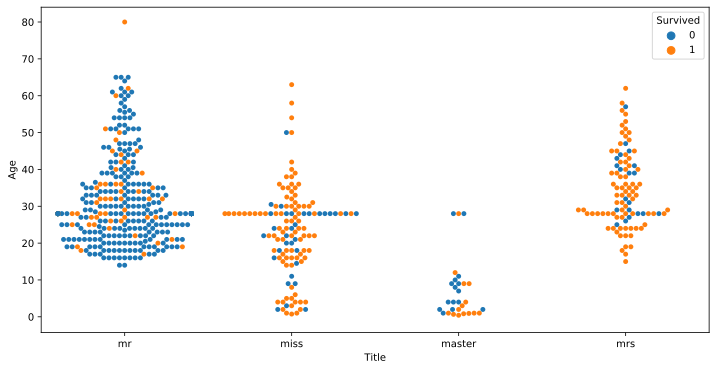

In [702]:
plt.figure(figsize = (12,6))
sns.swarmplot(x="Title", y="Age", hue="Survived", data=data_train)
plt.show()

Данная процедура очень похожа на лишнюю. По этим данным мы ни как не выделили отдельные категории которые сразу видно. Но Алгоритмы машинного обучения уже сами отпределят 

#### FamilySize

In [703]:
data_train['FamilySize'] = data_train['Parch'] +  data_train['SibSp'] + 1 
data_test['FamilySize'] = data_test['Parch'] +  data_test['SibSp'] + 1 

In [704]:
data_train['FamilySize'].value_counts()

1     375
2     111
3      70
4      21
6      20
7       9
11      6
5       6
8       5
Name: FamilySize, dtype: int64

## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [705]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 649 to 722
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           623 non-null    int64   
 1   Name             623 non-null    object  
 2   Sex              623 non-null    object  
 3   Age              623 non-null    float64 
 4   SibSp            623 non-null    int64   
 5   Parch            623 non-null    int64   
 6   Ticket           623 non-null    object  
 7   Fare             623 non-null    float64 
 8   Cabin            623 non-null    object  
 9   Embarked         623 non-null    object  
 10  Survived         623 non-null    int64   
 11  cabin_type       623 non-null    object  
 12  Type_People      623 non-null    category
 13  Sex_Type_People  623 non-null    object  
 14  Type_Fare        623 non-null    category
 15  Fare_log         623 non-null    float64 
 16  Title            623 non-null    object  


In [728]:
data_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived', 'cabin_type', 'Type_People',
       'Sex_Type_People', 'Type_Fare', 'Fare_log', 'Title', 'FamilySize'],
      dtype='object')

#### Уберем все признаки которые создали и оствим только оригинальные 

In [707]:
columns = [
            'Pclass', 
           #'Name', 
           'Sex', 
           'Age', 
           'SibSp', 
           'Parch', 
           #'Ticket', 
           'Fare',
           #'Cabin', 
           'Embarked', 
           'Survived', 
           #'Fare_log', 
           #'cabin_type',
           #'Type_People', 
           #'Sex_Type_People',
            #'Type_Fare',
            #'Title',
            #FamilySize
          ]


In [933]:
# Переведем Pclass в категориальную переменную
data_train['Pclass'] = data_train['Pclass'].astype('object')
data_test['Pclass'] = data_test['Pclass'].astype('object')

In [709]:
# male = 0
# female = 1
data_train['Sex'] = (data_train['Sex'] == 'female').map(int)

Перекодируем данные SEX

male = 0

female = 1

In [710]:
#### 

In [711]:
data_train_new = data_train[columns].copy()

In [712]:
data_test_new = data_test[columns].copy()

In [713]:
data_train_dum = pd.get_dummies(data_train_new)
data_test_dum = pd.get_dummies(data_test_new)

In [714]:
data_train_dum.head()

,Sex,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
649,0,28.0,0,0,7.5500,0,0,0,1,0,0,0,1
702,0,35.0,0,0,26.2875,1,1,0,0,0,0,0,1
57,1,21.0,0,0,10.5000,1,0,1,0,0,0,0,1
445,0,28.0,0,0,8.1125,1,0,0,1,0,0,0,1
406,0,34.0,1,0,21.0000,0,0,1,0,0,0,0,1


In [715]:
data_train_dum.shape

(623, 13)

In [716]:
data_test_dum.shape

(268, 11)

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [717]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [718]:
X_train = data_train_dum.drop('Survived', axis = 1)
y_train = data_train_dum['Survived']

In [727]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
649,0,28.0,0,0,7.5500,0,0,1,0,0,0,1
702,0,35.0,0,0,26.2875,1,0,0,0,0,0,1
57,1,21.0,0,0,10.5000,0,1,0,0,0,0,1
445,0,28.0,0,0,8.1125,0,0,1,0,0,0,1
406,0,34.0,1,0,21.0000,0,1,0,0,0,0,1


In [719]:
# Для хранения данных
score_list = []

In [720]:
def score(model, X_train = X_train, y_train = y_train, data = score_list):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    cross_score = cross_val_score(model, X_train, y_train, cv = cv, n_jobs = -1).mean()
    data.append(cross_score)
    return np.round(cross_score * 100,5)

##### LogisticRegression

In [722]:
Log_Reg = LogisticRegression(n_jobs = -1)
print(f'score: {score(Log_Reg)}')

score: 80.90194


##### KNeighborsClassifier

In [723]:
KNC = KNeighborsClassifier()

In [724]:
print(f'score: {score(KNC)}')

score: 67.73806


##### DecisionTreeClassifier

In [725]:
DTC= DecisionTreeClassifier()

In [726]:
print(f'score: {score(DTC)}')

score: 78.66452


##### RandomForestClassifier

In [729]:
RFC = RandomForestClassifier()

In [730]:
print(f'score: {score(RFC)}')

score: 80.75097


##### SVC

In [731]:
svc_clf = SVC()

In [732]:
print(f'score: {score(svc_clf)}')

score: 66.61548


##### NuSVC

In [733]:
nu_svc_clf = NuSVC()

In [734]:
print(f'score: {score(nu_svc_clf)}')

score: 79.13806


In [735]:
score_df = pd.Series(data = score_list, index = ['Log_Reg','KNC','DTC','RFC','SVC','NuSVC'] , name = 'score')

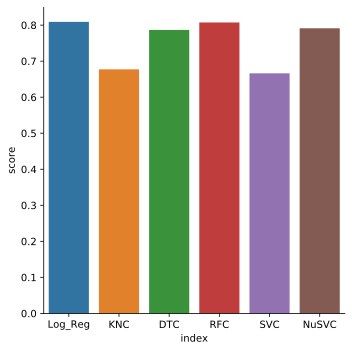

In [736]:
sns.catplot(x = 'index', y =  'score' , kind="bar", data =  score_df.to_frame().reset_index())
plt.show()

На сырых и ненормализованных данных лучше всего показали результаты: 
    
    LogisticRegression
    
    
    RandomForestClassifier
    
    NuSVC

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

#### Теперь добавим все новые признаки которые были созданы
Нормализацию не проводим

In [737]:
columns_all = [
            'Pclass', 
           #'Name', 
           'Sex', 
           'Age', 
           'SibSp', 
           'Parch', 
           #'Ticket', 
           'Fare',
           #'Cabin', 
           'Embarked', 
           'Survived', 
           'Fare_log', 
           'cabin_type',
           'Type_People', 
           'Sex_Type_People',
            'Type_Fare',
            'Title',
            'FamilySize'
          ]


In [738]:
data_train_new_2 = data_train[columns_all].copy()
data_train_dum_2 = pd.get_dummies(data_train_new_2)

In [739]:
X_train = data_train_dum_2.drop('Survived', axis = 1)
y_train = data_train_dum_2['Survived']

In [740]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Fare_log,FamilySize,Pclass_1,Pclass_2,Pclass_3,...,Sex_Type_People_male_Old,Sex_Type_People_male_Teenager,Type_Fare_price<8,Type_Fare_8<price<=15,Type_Fare_15<price<31,Type_Fare_31<price,Title_master,Title_miss,Title_mr,Title_mrs
PassengerId,,,,,,,,,,,,,,,,,,,,,
649,0,28.0,0,0,7.5500,2.145931,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
702,0,35.0,0,0,26.2875,3.306429,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
57,1,21.0,0,0,10.5000,2.442347,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
445,0,28.0,0,0,8.1125,2.209647,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
406,0,34.0,1,0,21.0000,3.091042,2,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [741]:
score_list_2 = []

In [742]:
def score_2(model, X_train = X_train, y_train = y_train, data = score_list_2):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    cross_score = cross_val_score(model, X_train, y_train, cv = cv, n_jobs = -1).mean()
    data.append(cross_score)
    return np.round(cross_score * 100,5)

##### LogisticRegression

In [743]:
score_2(Log_Reg)

83.62968

##### KNeighborsClassifier

In [744]:
score_2(KNC)

72.87871

##### DecisionTreeClassifier

In [745]:
score_2(DTC)

78.34065

##### RandomForestClassifier

In [746]:
score_2(RFC)

82.83742

##### SVC

In [747]:
score_2(svc_clf)

66.45548

##### NuSVC

In [748]:
score_2(nu_svc_clf)

80.42194

In [749]:
score_df_2 = pd.Series(data = score_list_2, index = ['Log_Reg','KNC','DTC','RFC','SVC','NuSVC'] , name = 'score')

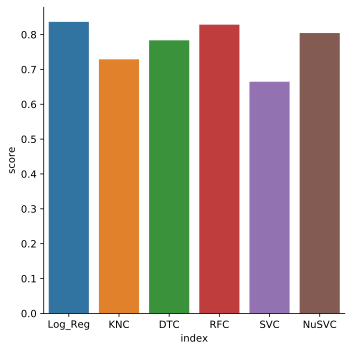

In [750]:
sns.catplot(x = 'index', y =  'score' , kind="bar", data = score_df_2.to_frame().reset_index())
plt.show()

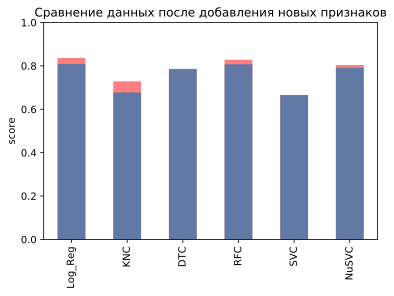

In [751]:
score_df_2.plot(kind = 'bar',  alpha = 0.5 ,color = 'r')
score_df.plot(kind = 'bar',  alpha = 0.7)
plt.title('Сравнение данных после добавления новых признаков')
plt.ylabel('score')
plt.axis([None,None,0,1])
plt.show()

По этим данным вы видим, что при добавление новых признаков качетво некоторых моделей значительно увеличилось. 

#### Произведем теперь нормализацию признаков

И теперь подберем признаки которые нам больше всего подходят и берем ненужные 

In [813]:
columns_all_2 = [
            'Pclass', 
           #'Name', 
           #'Sex', 
           'Age', 
           #'SibSp', 
           #'Parch', 
           #'Ticket', 
           'Fare',
           #'Cabin', 
           #'Embarked', 
           'Survived', 
           #'Fare_log', 
           #'cabin_type',
           #'Type_People', 
           'Sex_Type_People',
           'Type_Fare',
            #'Title',
            'FamilySize'
          ]


In [814]:
data_train_new_3 = data_train[columns_all_2].copy()

#нормализация наших числовых признаков
data_train_new_3['Fare'] = (data_train_new_3['Fare'] - data_train_new_3['Fare'].mean())/data_train_new_3['Fare'].std()

data_train_new_3['FamilySize'] = (data_train_new_3['FamilySize'] - data_train_new_3['FamilySize'].mean())/data_train_new_3['FamilySize'].std()


data_train_new_3['Age'] = (data_train_new_3['Age'] - data_train_new_3['Age'].mean())/data_train_new_3['Age'].std()

data_train_dum_3 = pd.get_dummies(data_train_new_3)

In [815]:
X_train = data_train_dum_3.drop('Survived', axis = 1)
y_train = data_train['Survived']

In [816]:
X_train.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_Type_People_female_Adult,Sex_Type_People_female_Child,Sex_Type_People_female_Old,Sex_Type_People_female_Teenager,Sex_Type_People_male_Adult,Sex_Type_People_male_Child,Sex_Type_People_male_Old,Sex_Type_People_male_Teenager,Type_Fare_price<8,Type_Fare_8<price<=15,Type_Fare_15<price<31,Type_Fare_31<price
PassengerId,,,,,,,,,,,,,,,,,,
649,-0.069845,-0.489486,-0.555119,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
702,0.489977,-0.118884,-0.555119,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
57,-0.629667,-0.431139,-0.555119,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
445,-0.069845,-0.478360,-0.555119,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
406,0.410003,-0.223464,0.034045,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [817]:
score_list_3 = []

In [818]:
def score_3(model, X_train = X_train, y_train = y_train, data = score_list_3):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    cross_score = cross_val_score(model, X_train, y_train, cv = cv, n_jobs = -1).mean()
    data.append(cross_score)
    return np.round(cross_score * 100,5)

##### LogisticRegression

In [819]:
score_3(Log_Reg)

82.99226

##### KNeighborsClassifier

In [820]:
score_3(KNC)

85.07871

##### DecisionTreeClassifier

In [821]:
score_3(DTC)

77.70323

##### RandomForestClassifier

In [822]:
score_3(RFC)

81.87226

##### SVC

In [823]:
score_3(svc_clf)

82.99484

##### NuSVC

In [824]:
score_3(nu_svc_clf)

83.30968

In [825]:
score_df_3 = pd.Series(data = score_list_3, index = ['Log_Reg','KNC','DTC','RFC','SVC','NuSVC'] , name = 'score')

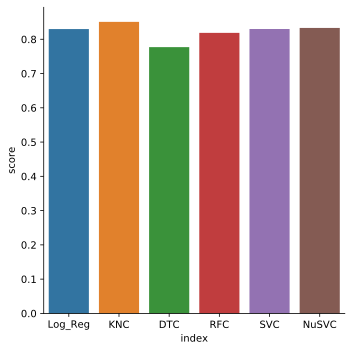

In [826]:
sns.catplot(x = 'index', y =  'score' , kind="bar", data = score_df_3.to_frame().reset_index())
plt.show()

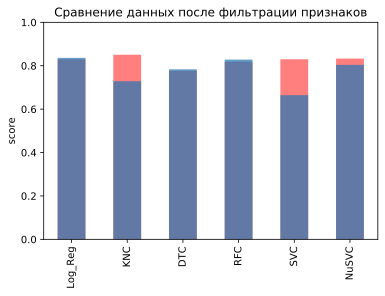

In [827]:
score_df_3.plot(kind = 'bar',  alpha = 0.5 ,color = 'r')
score_df_2.plot(kind = 'bar',  alpha = 0.7)
plt.title('Сравнение данных после фильтрации признаков')
plt.ylabel('score')
plt.axis([None,None,0,1])
plt.show()

Очень сильно подняли качетво модели KNC и SCV. Все наши модели вышли за 0.8, кроме DecisionTreeClassifier . Теперь осталось подобрать нужные параметры для наших моделей

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [873]:
columns_final = [
            'Pclass', 
           #'Name', 
           #'Sex', 
           'Age', 
           #'SibSp', 
           #'Parch', 
           #'Ticket', 
           'Fare',
           #'Cabin', 
           #'Embarked', 
           'Survived', 
           #'Fare_log', 
           #'cabin_type',
           #'Type_People', 
           'Sex_Type_People',
           'Type_Fare',
            #'Title',
            'FamilySize'
          ]

In [874]:
data_train_final = data_train[columns_final].copy()

#нормализация наших числовых признаков
data_train_final['Fare'] = (data_train_final['Fare'] - data_train_final['Fare'].mean())/data_train_final['Fare'].std()
data_train_final['FamilySize'] = (data_train_final['FamilySize'] - data_train_final['FamilySize'].mean())/data_train_final['FamilySize'].std()
data_train_final['Age'] = (data_train_final['Age'] - data_train_final['Age'].mean())/data_train_final['Age'].std()

data_train_final_dum = pd.get_dummies(data_train_final)

In [875]:
X_train = data_train_final_dum.drop('Survived', axis = 1)
y_train = data_train_final_dum['Survived']

In [876]:
X_train.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_Type_People_female_Adult,Sex_Type_People_female_Child,Sex_Type_People_female_Old,Sex_Type_People_female_Teenager,Sex_Type_People_male_Adult,Sex_Type_People_male_Child,Sex_Type_People_male_Old,Sex_Type_People_male_Teenager,Type_Fare_price<8,Type_Fare_8<price<=15,Type_Fare_15<price<31,Type_Fare_31<price
PassengerId,,,,,,,,,,,,,,,,,,
649,-0.069845,-0.489486,-0.555119,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
702,0.489977,-0.118884,-0.555119,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
57,-0.629667,-0.431139,-0.555119,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
445,-0.069845,-0.478360,-0.555119,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
406,0.410003,-0.223464,0.034045,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [877]:
from sklearn.model_selection import GridSearchCV

In [878]:
score_list_5 = []

In [879]:
def score_5(model, X_train = X_train, y_train = y_train, data = score_list_5):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    cross_score = cross_val_score(model, X_train, y_train, cv = cv, n_jobs = -1).mean()
    data.append(cross_score)
    return np.round(cross_score * 100,5)

#### LogisticRegression

In [880]:
params_Log_reg = {'penalty':['l1','l2','elasticnet'],
                 'C':[0.1,1,100,1000]}

In [881]:
GSV_Log_reg = GridSearchCV(Log_Reg, param_grid = params_Log_reg, n_jobs = -1)

In [882]:
GSV_Log_reg.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [883]:
Log_Reg = GSV_Log_reg.best_estimator_

In [884]:
score_5(Log_Reg)

83.63226

#### KNeighborsClassifier

In [885]:
params_KNC = {'n_neighbors':[1,3,5,7,8,10],
             'p':[1,2],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree','kd_tree','brute']
             }

In [886]:
GSV_KNC = GridSearchCV(KNC, param_grid = params_KNC, n_jobs = -1)

In [887]:
GSV_KNC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 8, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [888]:
KNC = GSV_KNC.best_estimator_

In [889]:
score_5(KNC)

84.92129

#### DecisionTreeClassifier

In [890]:
params_DTC = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,5,7,10,12],
             'min_samples_split':[1,2,3,5,7],
             'min_samples_leaf':[1,2,3],
             'max_features':['auto','sqrt','log2']}

In [891]:
GSV_TDC = GridSearchCV(DTC, param_grid = params_DTC, n_jobs = -1)

In [892]:
GSV_TDC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [893]:
DTC = GSV_TDC.best_estimator_

In [894]:
score_5(DTC)

82.66452

#### RandomForestClassifier

In [895]:
params_RFC = {'n_estimators':[50,100,200,500],
             'criterion':['gini','entropy'],
             'max_depth':[1,3,5,7,10,12]}

In [896]:
GSV_RFC = GridSearchCV(RFC, param_grid = params_RFC, n_jobs = -1)

In [897]:
GSV_RFC.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [898]:
RFC  = GSV_RFC.best_estimator_

In [899]:
score_5(RFC)

84.91871

##### SVC

In [900]:
params_SVC = {'C':[0.001,0.01,0.1,1,10,100,1000,10000],
             'gamma':['scale','auto'],
             'kernel':['linear','poly','rbf','sigmoid'],
             'shrinking':[True,False]}

In [901]:
GSV_SVC = GridSearchCV(svc_clf, param_grid = params_SVC, n_jobs = -1)

In [902]:
GSV_SVC.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [903]:
SVC = GSV_SVC.best_estimator_

In [904]:
score_5(SVC)

84.92387

#### NuSVC

In [905]:
params_NuSVC = {'nu':np.arange(0.1,1.1,0.1),
             'gamma':['scale','auto'],
             'kernel':['linear','poly','rbf','sigmoid']}

In [906]:
GSV_NuSVC = GridSearchCV(nu_svc_clf, param_grid = params_NuSVC, n_jobs = -1)

In [907]:
GSV_NuSVC.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=NuSVC(break_ties=False, cache_size=200,
                             class_weight=None, coef0=0.0,
                             decision_function_shape='ovr', degree=3,
                             gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                             probability=False, random_state=None,
                             shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'nu': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [908]:
NuSVC = GSV_NuSVC.best_estimator_

In [909]:
score_5(NuSVC)

83.63871

In [910]:
score_df_5 = pd.Series(data = score_list_5, index = ['Log_Reg','KNC','DTC','RFC','SVC','NuSVC'] , name = 'score')

In [912]:
score_df_5.to_frame()

,score
Log_Reg,0.836323
KNC,0.849213
DTC,0.826645
RFC,0.849187
SVC,0.849239
NuSVC,0.836387


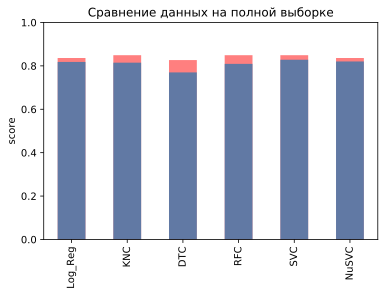

In [911]:
score_df_5.plot(kind = 'bar',  alpha = 0.5 ,color = 'r')
score_df_4.plot(kind = 'bar',  alpha = 0.7)
plt.title('Сравнение данных на полной выборке')
plt.ylabel('score')
plt.axis([None,None,0,1])
plt.show()

После подбора параметров, наши модели дали рост предсказания. и теперь все вышлм за предел 0.82

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [972]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Создадим словарь наших моделей для финального предсказаня на тестовых данных. 

In [921]:
pipleline = {
            'Log_Reg':Log_Reg,
             'KNC': KNC,
             'DTC': DTC,
             'RFC' :RFC,
             'SVC': SVC,
             'NuSVC': NuSVC
        }

In [914]:
columns_final = [
            'Pclass', 
           #'Name', 
           #'Sex', 
           'Age', 
           #'SibSp', 
           #'Parch', 
           #'Ticket', 
           'Fare',
           #'Cabin', 
           #'Embarked', 
           'Survived', 
           #'Fare_log', 
           #'cabin_type',
           #'Type_People', 
           'Sex_Type_People',
           'Type_Fare',
            #'Title',
            'FamilySize'
          ]

In [ ]:
data_train_final = data_train[columns_final].copy()

#нормализация наших числовых признаков
data_train_final['Fare'] = (data_train_final['Fare'] - data_train_final['Fare'].mean())/data_train_final['Fare'].std()
data_train_final['FamilySize'] = (data_train_final['FamilySize'] - data_train_final['FamilySize'].mean())/data_train_final['FamilySize'].std()
data_train_final['Age'] = (data_train_final['Age'] - data_train_final['Age'].mean())/data_train_final['Age'].std()

data_train_final_dum = pd.get_dummies(data_train_final)

In [917]:
X_train = data_train_final_dum.drop('Survived', axis = 1)
y_train = data_train_final_dum['Survived']

In [947]:
data_test_final = data_test[columns_final].copy()

#нормализация наших числовых признаков
data_test_final['Fare'] = (data_test_final['Fare'] - data_test_final['Fare'].mean())/data_test_final['Fare'].std()
data_test_final['FamilySize'] = (data_test_final['FamilySize'] - data_test_final['FamilySize'].mean())/data_test_final['FamilySize'].std()
data_test_final['Age'] = (data_test_final['Age'] - data_test_final['Age'].mean())/data_test_final['Age'].std()

data_test_final_dum = pd.get_dummies(data_test_final)

In [966]:
X_test = data_test_final_dum.drop('Survived', axis = 1)
y_test = np.array(data_test_final_dum['Survived'])

In [967]:
print(X_test.shape)
print(X_train.shape)

(268, 18)
(623, 18)


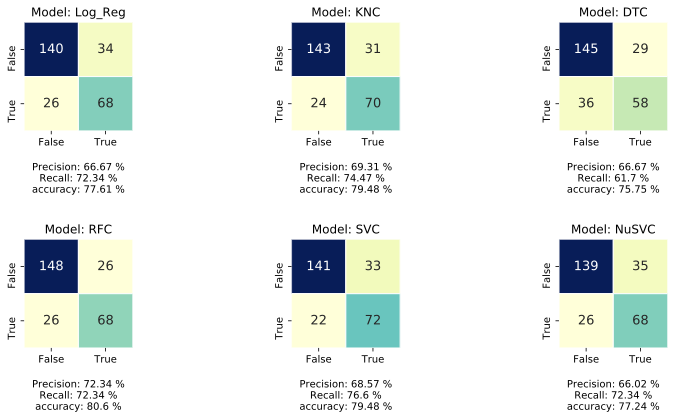

In [977]:
i = 0
j = 0
fig, ax = plt.subplots(2,3, figsize =(12,6) )
fig.subplots_adjust(hspace = 1, wspace = 1)


for key, model in pipleline.items():

    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    matrix = confusion_matrix(y_test, y_pred)
    
    if j == 3:
        i = 1
        j= 0
        
    sns.heatmap(matrix,annot=True,cmap='YlGnBu',
                                                fmt='d',
                                                linewidths=1,
                                                xticklabels = ['False','True'],
                                                yticklabels = ['False','True'],
                                                square = True,
                                                annot_kws={'size':13},
                                                cbar = False,
                                                ax  = ax[i,j])
    
    ax[i,j].set_xlabel(f'\nPrecision: {np.round(precision_score(y_test, y_pred) *100,2)} %\nRecall: {np.round(recall_score(y_test, y_pred) *100,2)} %\naccuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)} %')
    ax[i,j].set_title(f'Model: {key}')
    
    
    j+=1
plt.show()

По показателям выделились три модели. 

    RandomFores
    SVC
    KNC
    
Для предсказания можно будет использовать эти три модели. 

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

In [978]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [980]:
data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,Type_People,Sex_Type_People,Type_Fare,Fare_log,Title,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,
649,3,"willey, mr. edward",0,28.0,0,0,S.O./P.P. 751,7.5500,0,S,0,0,Adult,male_Adult,price<8,2.145931,mr,1
702,1,"silverthorne, mr. spencer victor",0,35.0,0,0,PC 17475,26.2875,E24,S,1,E,Adult,male_Adult,15<price<31,3.306429,mr,1
57,2,"rugg, miss. emily",1,21.0,0,0,C.A. 31026,10.5000,0,S,1,0,Teenager,female_Teenager,8<price<=15,2.442347,miss,1
445,3,"johannesen-bratthammer, mr. bernt",0,28.0,0,0,65306,8.1125,0,S,1,0,Adult,male_Adult,8<price<=15,2.209647,mr,1
406,2,"gale, mr. shadrach",0,34.0,1,0,28664,21.0000,0,S,0,0,Adult,male_Adult,15<price<31,3.091042,mr,2


Много признаков , котрые были представлены изначально были лишними. Это касается Name, Ticket, Cabin, Embarked, так как эти признакми нам ничем не помогли. 

Наблюдение Pclass была определены , как категориальная и по ней сделали Dummi кодирования. 

Помогло создание новых признаков для нашей модели. Особенно создание признака Type_People и объединение с Sex --> Sex_Type_People. Этот признак показал большую значимость в нашей модели. Но признак Type_People не был использован , так как он не показал никакого прироста только ухудшил наши модели. 


FamilySize - еще одине признак который помог улучшить нашу модель. А признаки из которых он был сделан, не использовалиь (SibSp + Parch). были бесполезны. 

Разделение на категории по признаку  Fare тоже сработало. Но вот логарифмирование Fare ни как не повлияло. 
Хорошо помогла нормализация признаков (Fare - Fare.mean)/Fare.std
Такая формула была применена ко всем числовым признакам. 

Признак Title  были бесполезны, мы выделили признак человека по названию. Но так как у нас  есть признак по полу и признак мужчина и женщина, то признак Title бесполезен. Но нам надо было его проверить . 

##### ниже указаны признаки которые мы оставили для модели. 

In [985]:
data_train_final.columns

Index(['Pclass', 'Age', 'Fare', 'Survived', 'Sex_Type_People', 'Type_Fare',
       'FamilySize'],
      dtype='object')

##### Стандартные признаки
'Pclass', 
 'Age', 
 'Fare', 
 
##### Новые признаки
 'Sex_Type_People', 
 'Type_Fare',
'FamilySize'